In [1]:
import torch
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
%matplotlib inline

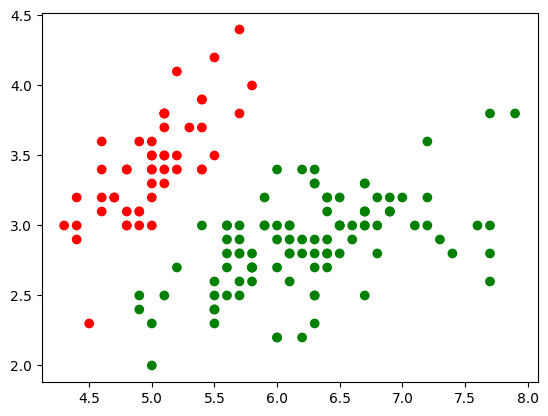

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target
Y = np.where(Y == 0, 0, 1)
colors = np.where(Y == 0, 'r', 'g')

plt.scatter(X[:, 0], X[:, 1], color=colors)
plt.show()

In [26]:
dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32))
data_iter = torch.utils.data.DataLoader(dataset, 30, shuffle=True)

In [33]:
model = torch.nn.Sequential(torch.nn.Linear(X.shape[1], 1))
model[0].weight.data.normal_(0, 0.01)
model[0].bias.data.fill_(0)

tensor([0.])

In [28]:
loss = torch.nn.MSELoss()

In [34]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [47]:
history = []
for epoch in range(20):
    for x, y in data_iter:
        l = loss(torch.sigmoid(model(x)), y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        print(f"\r epoch {epoch} loss = {l}", end='')
        history.append(l.detach().numpy())
    print("")

 epoch 0 loss = 0.22248680889606476
 epoch 1 loss = 0.17732219398021698
 epoch 2 loss = 0.20014882087707525
 epoch 3 loss = 0.21146425604820251
 epoch 4 loss = 0.22242985665798187
 epoch 5 loss = 0.20016883313655853
 epoch 6 loss = 0.24493269622325897
 epoch 7 loss = 0.21143272519111633
 epoch 8 loss = 0.23402714729309082
 epoch 9 loss = 0.22253125905990685
 epoch 10 loss = 0.23388601839542393
 epoch 11 loss = 0.24434185028076172
 epoch 12 loss = 0.18930669128894806
 epoch 13 loss = 0.24470220506191254
 epoch 14 loss = 0.22246272861957556
 epoch 15 loss = 0.20027735829353333
 epoch 16 loss = 0.24478287994861603
 epoch 17 loss = 0.23361597955226898
 epoch 18 loss = 0.22240538895130157
 epoch 19 loss = 0.24481791257858276


In [48]:
torch.sigmoid(model(torch.tensor(X, dtype=torch.float32)))

tensor([[0.6578],
        [0.6483],
        [0.6466],
        [0.6436],
        [0.6570],
        [0.6676],
        [0.6466],
        [0.6548],
        [0.6373],
        [0.6498],
        [0.6659],
        [0.6509],
        [0.6466],
        [0.6366],
        [0.6766],
        [0.6787],
        [0.6674],
        [0.6576],
        [0.6725],
        [0.6609],
        [0.6627],
        [0.6595],
        [0.6490],
        [0.6549],
        [0.6511],
        [0.6504],
        [0.6543],
        [0.6598],
        [0.6587],
        [0.6467],
        [0.6476],
        [0.6620],
        [0.6667],
        [0.6732],
        [0.6495],
        [0.6524],
        [0.6655],
        [0.6553],
        [0.6384],
        [0.6568],
        [0.6556],
        [0.6321],
        [0.6407],
        [0.6549],
        [0.6608],
        [0.6461],
        [0.6612],
        [0.6447],
        [0.6639],
        [0.6536],
        [0.6888],
        [0.6773],
        [0.6857],
        [0.6504],
        [0.6749],
        [0

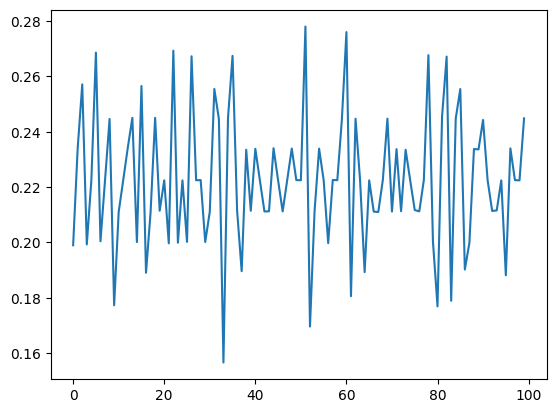

In [49]:
plt.plot(np.arange(len(history)), history)
plt.show()